In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import statsmodels.api as sm

Lectura de ambos sets de datos y creación del dataset correspondiente

In [2]:
data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670231,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.215607496,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.003237855,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.566840819,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0
324446,ZYNE,2022q2,0.0,0.0,9168.7695,0.0,-775.92786,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.14,1.14,43595.959,6.0,2022.0,2.0


In [3]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\nlevel 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [4]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


Agrupamiento por firma y selección de únicamente el penúltimo trimestre en el historial

In [5]:
df.groupby(['firm']).nth([-2])

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
firm,,,,,,,,,,,,,,,,,,,,,
A,2022q1,1674000,764000,534000,0,-37000,20000,36000,10327000,5173000,...,2730000,5154000,131.88896173,132.33,300113.377,3,2022,1,"Agilent Technologies, Inc",Manufacturing
AA,2022q1,3293000,2181000,213000,125000,-70000,25000,210000,15988000,9731000,...,1727000,6257000,89.69416038999999,90.03,185403.032,3,2022,1,Alcoa Corp,Manufacturing
AAIC,2022q1,8470,4773,0,0,-4111,0,2287,920883,702786,...,163920,218097,3.47,3.47,35016.392,3,2022,1,Arlington Asset Investment Corp,Finance and Insurance
AAL,2022q1,8899000,0,10622000,0,92000,455000,-451000,67401000,76341000,...,35461000,-8940000,18.25,18.25,649160.117,3,2022,1,American Airlines Group Inc,Transportation and Warehousing
AAME,2022q1,51608,0,47812,0,0,0,954,375031,248608,...,33738,126423,3.1128248464,3.13,20378.576,3,2022,1,Atlantic American Corp,Finance and Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2022q1,38034.0,23413.0,23275.0,8901.0,6669.0,0.0,12.0,116480.0,22619.0,...,484.0,93861.0,4.57,4.57,66686.135,3.0,2022.0,1.0,Zevia Pbc,Manufacturing
ZVO,2022q1,61633.0,39829.0,29036.0,0.0,-127.0,0.0,78.0,148751.0,137484.0,...,0.0,11267.0,0.8201,0.8201,34054.879,3.0,2022.0,1.0,Zovio Inc,Educational Services
ZWS,2022q1,239600.0,137700.0,56900.0,1100.0,1100.0,4800.0,10000.0,1118600.0,924900.0,...,540300.0,193700.0,35.281528,35.4,125782.456,3.0,2022.0,1.0,Zurn Elkay Water Solutions Corp,Manufacturing


1.1 Calcula matriz de varianza y covarianza, así como matriz de correlación de las variables independientes y la dependiente. Explicar qué es la varianza, covarianza y correlación. Interpreta la matriz de correlación. Tiene que utilizar álgebra matricial y corroborar resultados con funciones de Python.

In [6]:
dfExtra = df

In [7]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))

#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )

#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )

#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome
dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))
 #EPS = net income / sharesoutstanding
 
dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\2599130522.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))
C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\2599130522.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [8]:
df_Services = dfExtra[(dfExtra['Sector NAICS\nlevel 1']=='Accommodation and Food Services') | (dfExtra['Sector NAICS\nlevel 1']=='Administrative and Support and Waste Management and Remediation Services') | (dfExtra['Sector NAICS\nlevel 1']=='Arts, Entertainment, and Recreation') | (dfExtra['Sector NAICS\nlevel 1']=='Educational Services') | (dfExtra['Sector NAICS\nlevel 1']=='Health Care and Social Assistance') | (dfExtra['Sector NAICS\nlevel 1']=='Information') | (dfExtra['Sector NAICS\nlevel 1']=='Other Services (except Public Administration)') |  (dfExtra['Sector NAICS\nlevel 1']=='Professional, Scientific, and Technical Services') | (dfExtra['Sector NAICS\nlevel 1']== 'Transportation and Warehousing')].copy()

#EPSP = EPS \ NetIncome('adjprice')
df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )


df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['RNQ'] = df_Services.groupby(['firm'])['R'].shift(-1)


df_Services = df_Services.sort_values(by=['q','market_value'], ascending = True)
df_Services['size'] = df_Services.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))

C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\1554156323.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )
C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\1554156323.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_Service

In [9]:
df_Services

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ,size
209256,ODFL,2000q1,112799.0,0.0,108076.0,0.0,-9.0,899.0,1488.0,258721.0,...,113365.0,1.142395,0.093085,0.157432,2327.0,0.279928,0.023449,NaN,NaN,small
180466,MD,2000q1,59409.0,0.0,52360.0,0.0,80.0,987.0,2764.0,343029.0,...,232265.0,2.050305,0.152591,0.006122,3378.0,0.216188,0.029819,NaN,NaN,small
223025,PENN,2000q1,53262.0,40918.0,2176.0,2322.0,-154.0,1932.0,2141.0,197579.0,...,69961.0,0.422423,0.037767,0.456992,3619.0,0.242756,0.021851,NaN,NaN,small
19254,ANSS,2000q1,17380,2003,10143,0,997,0,1744,88630,...,67806.0,0.391366,0.000000,0.000000,4487.0,0.278407,0.025898,NaN,NaN,small
22404,ARCB,2000q1,443015,0,416734,0,795,4521,9383,747698,...,233260.0,1.124132,0.057143,0.231988,13172.0,0.666527,0.063479,NaN,NaN,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,MA,2022q2,5497000.0,0.0,2479000.0,0.0,-113000.0,107000.0,523000.0,36231000.0,...,6236000.0,0.020323,0.020286,0.379399,2275000.0,2.338984,0.007414,-0.140910,NaN,big
300325,V,2022q2,7275000.0,0.0,3127000.0,0.0,-208000.0,111000.0,418000.0,85410000.0,...,35483000.0,0.094787,0.038040,0.240557,3411000.0,1.794056,0.009112,-0.165252,NaN,big
182535,META,2022q2,28822000.0,5192000.0,15272000.0,0.0,-172000.0,0.0,1499000.0,169779000.0,...,125767000.0,0.288196,0.007510,0.087125,6687000.0,2.470880,0.015323,-0.768413,NaN,big
125851,GOOGL,2022q2,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,355185000.0,...,255419000.0,0.177987,0.000000,0.074415,16002000.0,24.300688,0.011151,-0.113746,NaN,big


In [10]:
df_cov = df_Services[['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']]
df_variables = df_cov.dropna()
df_variables

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
209256,0.023449,1.142395,0.093085,0.157432
180466,0.029819,2.050305,0.152591,0.006122
223025,0.021851,0.422423,0.037767,0.456992
19254,0.025898,0.391366,0.000000,0.000000
22404,0.063479,1.124132,0.057143,0.231988
...,...,...,...,...
176595,0.007414,0.020323,0.020286,0.379399
300325,0.009112,0.094787,0.038040,0.240557
182535,0.015323,0.288196,0.007510,0.087125
125851,0.011151,0.177987,0.000000,0.074415


Varianza mide, valga la redundancia, la variación de los datos del promedio de un determinado conjunto de datos. Su fómula se compone de la siguiente manera:
 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyrqMqeDwINvtAhXdsKnyVcGTonKtb7jNjJw&usqp=CAU" alt="Formula de la varianza"/>

Asismismo, la covariaza es la relación de coincidencia de la desviación estándar del promedio de una variable respecto a la desviación del promedio de otra. En fórmula, se define como:

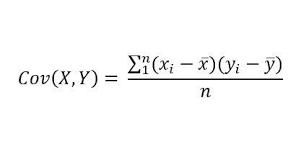

Por otro lado, la Correlación es la covarianza de dos variables normalizada a través de la desviación estándar. la correlación se encuentra medida en un ranfo de -1 a 1. Su fórmula se compone de la siguiente manera:

<img src="https://economipedia.com/wp-content/uploads/2015/12/formula-correlaci%C3%B3n.png" alt="Formula de la varianza"/>



**Cálculo de matrices con álgebra lineal**

Covarianza

In [11]:
df_matrix = np.matrix(df_variables)
n = df_variables.count()['EPSP']
df_matrix_s = (df_matrix.T * df_matrix) / n 

df_matrix_mean = df_variables.mean()
df_matrix_mean = np.matrix(df_matrix_mean).T
df_matrix_mean_s = df_matrix_mean * df_matrix_mean.T

cov_matrix = pd.DataFrame(data = df_matrix_s - df_matrix_mean_s)
cov_matrix.columns = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
cov_matrix.index = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
cov_matrix

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.051205,-0.042944,-0.001946,-0.000553
BookToMarketRatio,-0.042944,0.712604,-0.007595,-0.028994
ShortFinancialLeverage,-0.001946,-0.007595,0.069538,0.002405
LongFinancialLeverage,-0.000553,-0.028994,0.002405,0.065225


Correlación

In [12]:
df_matrix_std = np.matrix(df_variables.std())
corr_matrix = cov_matrix / (df_matrix_std.T * df_matrix_std)
corr_matrix

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.999967,-0.224808,-0.032617,-0.009567
BookToMarketRatio,-0.224808,0.999967,-0.034119,-0.134480
ShortFinancialLeverage,-0.032617,-0.034119,0.999967,0.035706
LongFinancialLeverage,-0.009567,-0.134480,0.035706,0.999967


**Cálculo de matrices con numpy**

Covarianza

In [13]:
df_variables.cov()

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.051206,-0.042946,-0.001946,-0.000553
BookToMarketRatio,-0.042946,0.712627,-0.007596,-0.028995
ShortFinancialLeverage,-0.001946,-0.007596,0.069540,0.002405
LongFinancialLeverage,-0.000553,-0.028995,0.002405,0.065227


Correlación

In [14]:
df_variables.corr()

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,1.000000,-0.224815,-0.032618,-0.009567
BookToMarketRatio,-0.224815,1.000000,-0.034120,-0.134485
ShortFinancialLeverage,-0.032618,-0.034120,1.000000,0.035707
LongFinancialLeverage,-0.009567,-0.134485,0.035707,1.000000


Para ambos casos de varianza-covarianza y de correlación, la implementación por álgebra matricial dista muy ligeramente de las obtenidas por medio de numpy; por lo que se puede deducir que el cálculo resulta aceptable.

Las matrices varianza-covarianza resaltan el hecho de que la covarianza es negativa en muchos casos; lo que se intuye como una covariación que se comporte de manera inversa: valores altos tendrán coeficientes bajos; mientras que valores bajos tendrán coreficientes altos.

Las matrices de correlación del mismo modo cuentan con tendencia negativa en la gran mayoría de los coeficientes obtenidos.

1.2 Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.

Leverage points

In [15]:
df_to_leverage = df_Services[['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']]
df_to_leverage = df_to_leverage.dropna()
x = np.matrix(df_to_leverage)
x_ones = np.ones((df_to_leverage.count()['EPSP'], 1))
x = np.c_[x_ones, x]
h = x * np.linalg.inv(x.T * x) * x.T

df_leverage = pd.DataFrame(data = {'Leverage': np.diag(h)})
df_leverage = pd.concat([df_to_leverage, df_leverage], axis=1, join = "inner")

threshold_leverage = 3 * (len(['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']) + 1) / n
df_leverage[df_leverage['Leverage'] > threshold_leverage]


,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,Leverage
28256,0.012146,0.338265,0.120755,0.205315,0.000505
22414,0.025795,0.481403,0.007378,0.151978,0.000628
12884,-0.100593,0.730391,0.016361,0.297037,0.000844
22426,0.046095,0.596167,0.027715,0.001362,0.001303
19277,0.009730,0.164953,0.000000,0.000000,0.000551
26568,0.009759,0.342457,0.050700,0.096329,0.000523
19279,-0.010596,0.274991,0.028037,0.168250,0.001291
4521,0.007573,0.212911,0.000000,0.000000,0.000650
23876,0.011714,0.800633,0.000025,0.330837,0.001276
26578,0.009845,0.225497,0.104290,0.014298,0.004293


In [16]:
df_Services = df_Services.dropna()
df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['R'] = df_Services['R'].fillna(0)

C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\702312711.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
C:\Users\Alex\AppData\Local\Temp\ipykernel_4720\702312711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Services['R'] = np.log(df_Services['adjprice'].astype(np.

In [17]:
independent_var = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
dependent_var = ['R']

model = sm.OLS(df_Services[dependent_var], sm.add_constant(df_Services[independent_var])).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag
leverage_sm = pd.DataFrame(data = {"leverage": leverage})
leverage_sm = pd.concat([df_Services[independent_var], leverage_sm], axis = 1, join ="inner")
leverage_sm[leverage_sm['leverage'] > threshold_leverage]

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,leverage
22427,0.027384,0.502598,0.021594,0.001564,0.000992
16218,0.013801,0.363887,0.032737,0.315652,0.000732
16223,0.012115,0.355825,0.027180,0.234427,0.001189
3454,0.018090,0.604159,0.005753,0.045201,0.000956
17144,0.000654,1.831384,0.113516,0.463980,0.001143
16245,0.013816,0.355224,0.000000,0.305725,0.013624
5719,0.003612,0.464725,0.000000,0.000000,0.000566
12652,0.006417,0.154510,0.040865,0.436585,0.000947
22464,0.000757,0.566650,0.032354,0.116350,0.000848
17517,0.007369,0.319636,0.000000,0.000000,0.000516


In [18]:
predictions = model.predict(sm.add_constant(df_Services[independent_var]))
errors = np.matrix(df_Services[dependent_var]).T - np.matrix(predictions)

mse = np.square(errors).sum() / (df_Services[independent_var].count()['EPSP'] - (len(independent_var) + 1))
squared_error = np.sqrt(mse * (1 - leverage))

std_residuals = pd.DataFrame((errors / squared_error).T)
std_residuals.columns = ['std_residuals']
std_residuals = pd.concat([df_Services['R'], std_residuals], axis = 1)
std_residuals = std_residuals.dropna()
std_residuals[std_residuals['std_residuals'] > 3]

,R,std_residuals
1488,0.000000,3.228221
16245,0.958286,3.235885
23639,0.087628,3.042663
23642,0.118492,3.655060
23646,0.080978,3.142433
23659,0.514613,4.325146
23660,0.229316,5.521856
23661,-0.030863,3.733424
23885,0.475676,4.553630
23892,-0.587281,3.306234


In [19]:
influence_sum = influence.summary_frame()
influence_sum

,dfb_const,dfb_EPSP,dfb_BookToMarketRatio,dfb_ShortFinancialLeverage,dfb_LongFinancialLeverage,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
209260,-0.000004,-0.000059,-0.000180,-0.000004,-0.000037,1.020243e-08,-0.022022,0.000105,-0.000226,-0.022022,-0.000226
19258,-0.001593,-0.000050,0.000269,0.000117,0.001171,5.476108e-07,-0.187759,0.000078,-0.001655,-0.187755,-0.001655
223029,0.000898,-0.000297,-0.000384,0.000141,-0.002369,1.400416e-06,-0.190022,0.000194,-0.002646,-0.190019,-0.002646
49145,0.000175,-0.000103,-0.000287,-0.000009,-0.000296,3.586925e-08,-0.028092,0.000227,-0.000423,-0.028091,-0.000423
73027,-0.001168,0.000096,0.000175,0.000091,0.000867,2.992228e-07,-0.139445,0.000077,-0.001223,-0.139442,-0.001223
...,...,...,...,...,...,...,...,...,...,...,...
176594,-0.000678,0.000013,0.000526,0.000113,-0.000496,4.512450e-07,-0.208841,0.000052,-0.001502,-0.208837,-0.001502
300324,-0.000580,0.000006,0.000263,-0.000010,0.000144,9.521919e-08,-0.102427,0.000045,-0.000690,-0.102425,-0.000690
182534,-0.006240,-0.000069,0.001779,0.000467,0.003699,8.216169e-06,-0.821899,0.000061,-0.006409,-0.821894,-0.006409
125850,0.003500,-0.000062,-0.001193,-0.000329,-0.002080,2.532718e-06,0.442984,0.000065,0.003559,0.442977,0.003559


In [20]:
r_res = pd.concat([df_Services['R'], influence_sum], axis = 1)
std_residuals_ib = r_res[['R', 'student_resid']]
std_residuals_ib[std_residuals_ib['student_resid'] > 3]

,R,student_resid
49149,1.495801,3.101249
10808,1.642616,3.326934
29978,1.638148,3.377781
239146,3.496363,7.465302
10809,1.827714,3.762237
...,...,...
127918,1.694383,3.517608
177402,2.779580,5.908617
82289,1.725454,3.502843
15290,2.089476,4.355758


**Análisis de multicolinearidad**

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

multicol_info_df = pd.DataFrame()
var_df = pd.concat([df_Services[dependent_var], df_Services[independent_var]], axis = 1)
multicol_info_df['variable'] = var_df.columns
multicol_info_df['value'] = [vif(var_df.values, i) for i in range(len(var_df.columns))]
multicol_info_df

,variable,value
0,R,1.084476
1,EPSP,1.122912
2,BookToMarketRatio,1.122405
3,ShortFinancialLeverage,1.016096
4,LongFinancialLeverage,1.090669


Como se puede ver arriba, los valores de multicolinearidad de cada una de las variables independientes oscila en un rango entre 1.00 a 1.12. Considerando que un valor aproximado a 2.5 comienza a denotar comportamientos de multicolinearidad de variabes, los valores obtenidos se encuentran dentro de un rango muy aceptable.

Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado. 

In [22]:
#TODO

Estima e interpreta un modelo de regresión múltiple después de atender los problemas anteriores. Tiene que utilizar álgebra matricial para estimar coeficientes y errores estándar del modelo de regresión, y utilizar funciones de Python para corroborar resultados. 

Resumen del modelo

Como se puede observar, el porcentaje de R^" es de apenas 7%, por lo que se mantiene la tendencia vista en entregables anteriores, donde la selección de variables no es la adecuada. 

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:17:23   Log-Likelihood:                -17003.
No. Observations:               26796   AIC:                         3.402e+04
Df Residuals:                   26791   BIC:                         3.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1013      0.004     23.195      0.000       0.093       0.110
EPSP                       0.4692      0.013     37.512      0.000       0.445       0.494
BookToMarketRatio         -0.0640      0.003    -19.034      0.000      -0.071      -0.057
ShortFinancialLeverage    -0.0277      0.010     -2.753      0.006      -0.047      -0.008
LongFinancialLeverage      0.0029      0.011      0.261      0.794      -0.019       0.024
==============================================================================
Omnibus:                     5484.742   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171313.186
Skew:                          -0.244   Prob(JB):                         0.00
Kurtosis:                      15.377   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
variables_df = pd.DataFrame(data = df_Services[independent_var])
variables_df = variables_df.dropna()

x = np.matrix(variables_df)
x_ones = np.ones((df_Services.count()['EPSP'], 1))
x = np.c_[x_ones, x]

y = np.matrix(df_Services[dependent_var])
bs = pd.DataFrame(np.linalg.inv(x.T * x) * x.T * y)
variables_df = independent_var + ["const"]
bs.index = variables_df
bs



,0
EPSP,0.101264
BookToMarketRatio,0.469155
ShortFinancialLeverage,-0.064021
LongFinancialLeverage,-0.027737
const,0.002867


Obtención de la matriz de error de varianza-covarianza a partir del cálculo matricial entre las matrices y,x y la transofmración en matriz de bs.

In [25]:
error = y - x * np.matrix(bs)
var_cov_error = error * error.T
var_error = np.diag(var_cov_error)
print(np.matrix(var_error))

[[1.01026523e-04 7.34372088e-03 7.52095939e-03 ... 1.40721399e-01
  4.08787426e-02 3.09600206e-02]]
